<h1><i><u>PROJECT</h1>

<h2><i><u>Initialize Packages 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 


<h3><i><u>Read CSV file from the device.


In [3]:
df = pd.read_csv(r"D:\data_science\csv_files\Big_Black_Money_Dataset.csv")


In [4]:
print(df.to_string())

     Transaction ID       Country  Amount (USD)   Transaction Type  Date of Transaction Person Involved      Industry Destination Country  Reported by Authority Source of Money  Money Laundering Risk Score  Shell Companies Involved Financial Institution Tax Haven Country
0      TX0000000001        Brazil  3.267530e+06  Offshore Transfer  2013-01-01 00:00:00     Person_1101  Construction                 USA                   True         Illegal                            6                         1               Bank_40         Singapore
1      TX0000000002         China  4.965767e+06    Stocks Transfer  2013-01-01 01:00:00     Person_7484  Luxury Goods        South Africa                  False         Illegal                            9                         0              Bank_461           Bahamas
2      TX0000000003            UK  9.416750e+04    Stocks Transfer  2013-01-01 02:00:00     Person_3655  Construction         Switzerland                   True         Illegal        

<h3><u><i>Check whether the numeric coloumns statics.

In [5]:
print(df.describe())

       Amount (USD)  Money Laundering Risk Score  Shell Companies Involved
count  1.000000e+04                 10000.000000              10000.000000
mean   2.501818e+06                     5.526400                  4.469400
std    1.424364e+06                     2.893603                  2.879773
min    1.003180e+04                     1.000000                  0.000000
25%    1.279005e+06                     3.000000                  2.000000
50%    2.501310e+06                     6.000000                  4.000000
75%    3.722416e+06                     8.000000                  7.000000
max    4.999812e+06                    10.000000                  9.000000


<h3><u><i>Check if there any null value in the data.

In [6]:
df.isnull().any()

Transaction ID                 False
Country                        False
Amount (USD)                   False
Transaction Type               False
Date of Transaction            False
Person Involved                False
Industry                       False
Destination Country            False
Reported by Authority          False
Source of Money                False
Money Laundering Risk Score    False
Shell Companies Involved       False
Financial Institution          False
Tax Haven Country              False
dtype: bool

<h3><u><i>Replacing space with underscore.

In [7]:
df.columns = [i.replace(' ',"_")for i in df.columns]
print(df.columns)

Index(['Transaction_ID', 'Country', 'Amount_(USD)', 'Transaction_Type',
       'Date_of_Transaction', 'Person_Involved', 'Industry',
       'Destination_Country', 'Reported_by_Authority', 'Source_of_Money',
       'Money_Laundering_Risk_Score', 'Shell_Companies_Involved',
       'Financial_Institution', 'Tax_Haven_Country'],
      dtype='object')


<h3><u><i>Check for invalid datatypes for the columns.

In [8]:
df.dtypes

Transaction_ID                  object
Country                         object
Amount_(USD)                   float64
Transaction_Type                object
Date_of_Transaction             object
Person_Involved                 object
Industry                        object
Destination_Country             object
Reported_by_Authority             bool
Source_of_Money                 object
Money_Laundering_Risk_Score      int64
Shell_Companies_Involved         int64
Financial_Institution           object
Tax_Haven_Country               object
dtype: object

<h3><u><i>Correcting invalid datatypes


In [9]:
df['Date_of_Transaction'] = pd.to_datetime(df['Date_of_Transaction'])
df['Date_of_Transaction'].dtype

dtype('<M8[ns]')

<h1><u><i>DATA CLEANED!

<h4><u><i>1. Which countries have the highest frequency of black money transactions?


C:\Users\nikhi\AppData\Local\Temp\ipykernel_16648\69862498.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df1, x = "Country",y = 'Amount_(USD)',palette='husl')


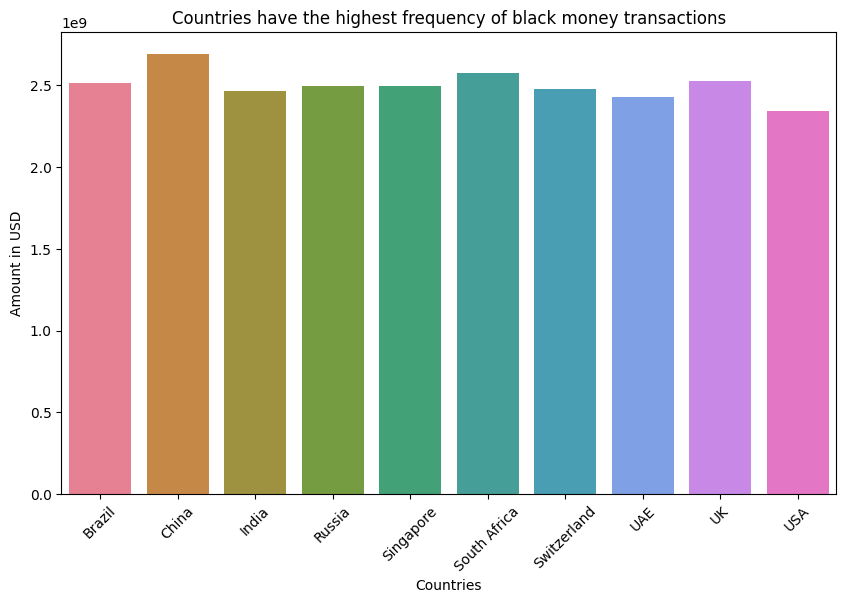

In [55]:
df1 = pd.pivot_table(
    data = df,
    index = 'Country',
    values='Amount_(USD)',
    aggfunc="sum"
)
plt.figure(figsize=(10,6))
sns.barplot(data = df1, x = "Country",y = 'Amount_(USD)',palette='husl')
plt.title('Countries have the highest frequency of black money transactions')
plt.xlabel("Countries")
plt.ylabel('Amount in USD')
plt.xticks(rotation=45)
plt.show()

<h5><i>Conclusion:The graph shows which countries have the highest number of black money transactions. Countries with taller bars have more frequent transactions, suggesting that these nations might have a higher level of suspicious or illegal financial activity. This can help identify regions that may require stricter financial monitoring or regulation.


<h4><u><i>2. How do different transaction types (Offshore Transfer, Property Purchase, etc.) vary in terms of transaction amounts?


C:\Users\nikhi\AppData\Local\Temp\ipykernel_16648\2996846496.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df,y =  'Amount_(USD)',x ='Transaction_Type' ,palette='tab10')


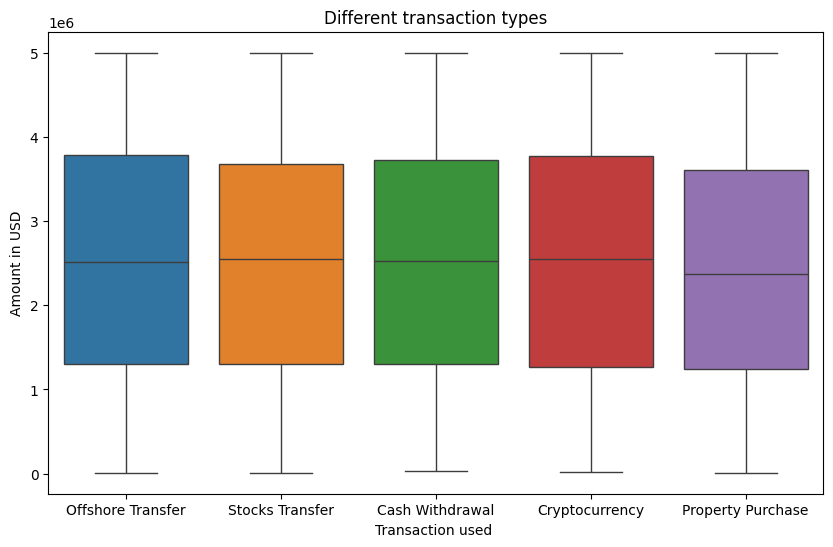

In [56]:

plt.figure(figsize=(10,6))
sns.boxplot(data = df,y =  'Amount_(USD)',x ='Transaction_Type' ,palette='tab10')
plt.title('Different transaction types')
plt.xlabel("Transaction used ")
plt.ylabel('Amount in USD')
plt.show()

<h5><i>Conclusion:
The boxplot shows how transaction amounts differ across various types, like Offshore Transfers or Property Purchases. Some transaction types have higher amounts (taller boxes) and more variation, while others are more consistent. The lines in the middle of each box represent the typical transaction amount for that type. Outliers show unusually large or small transactions.


<h4><u><i>3. What is the relationship between the number of shell companies involved and the money laundering risk score?


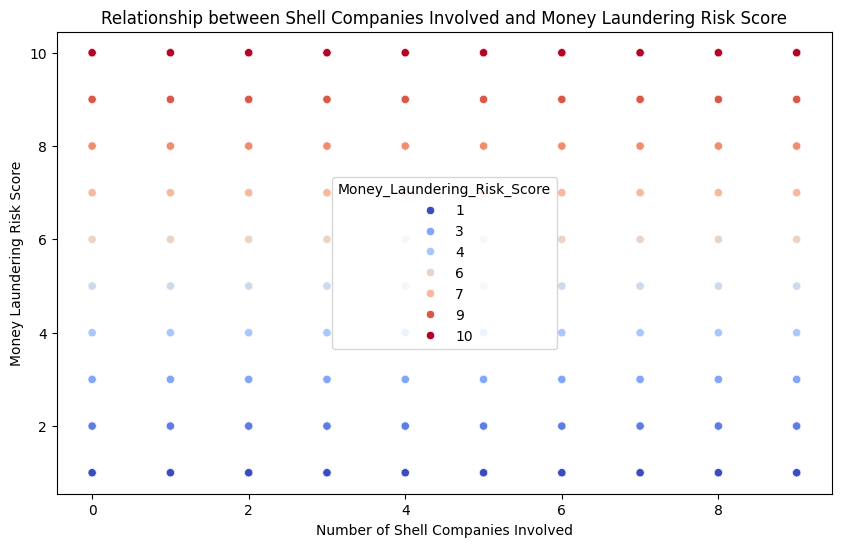

In [57]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Shell_Companies_Involved', y='Money_Laundering_Risk_Score', palette='coolwarm', hue='Money_Laundering_Risk_Score')
plt.title('Relationship between Shell Companies Involved and Money Laundering Risk Score')
plt.xlabel('Number of Shell Companies Involved')
plt.ylabel('Money Laundering Risk Score')
plt.show()



<h5><i>Conclusion:
The scatter plot shows how the number of shell companies involved relates to the money laundering risk score. If the points trend upward, it means that involving more shell companies tends to increase the risk. If there’s no clear pattern, the number of shell companies may not strongly affect the risk score.


<h4><u><i>4. What is the total value of transactions for each industry?

C:\Users\nikhi\AppData\Local\Temp\ipykernel_16648\3330961623.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df4,x='Industry',y = 'Amount_(USD)' ,palette='Set2')


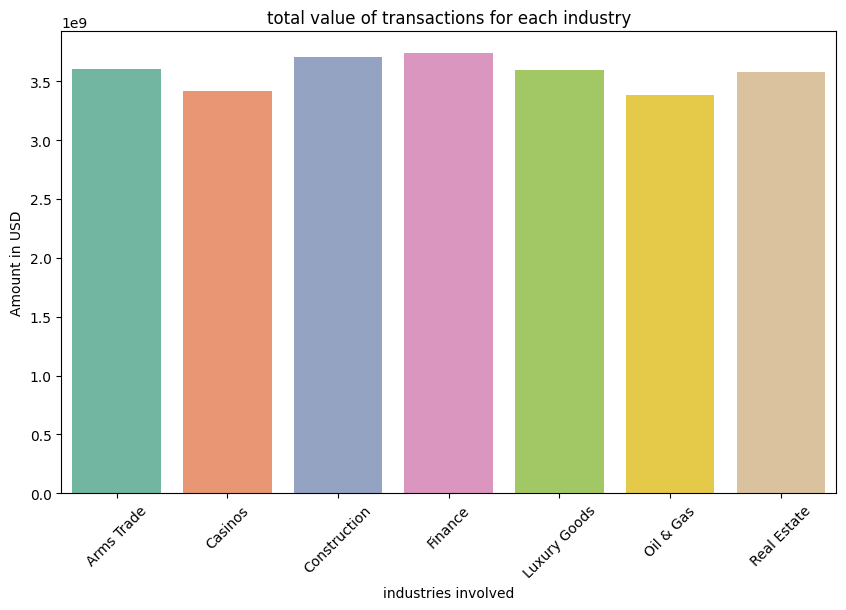

In [14]:
df4 = pd.pivot_table(
    data= df,
    index='Industry',
    values= 'Amount_(USD)',
    aggfunc='sum'
)
plt.figure(figsize=(10,6))
sns.barplot(data=df4,x='Industry',y = 'Amount_(USD)' ,palette='Set2')
plt.xticks(rotation=45)
plt.title('total value of transactions for each industry')
plt.xlabel("industries involved")
plt.ylabel('Amount in USD')
plt.show()


<h5><i>Conclusion:
The bar plot shows the total value of transactions for each industry. Industries with taller bars have higher total transaction amounts, indicating they handle more money. This helps identify which industries are involved in larger financial transactions, potentially pointing to sectors that require more monitoring for risks like money laundering or illegal activities.


<h4><u><i>5. How do money laundering risk scores vary by country?


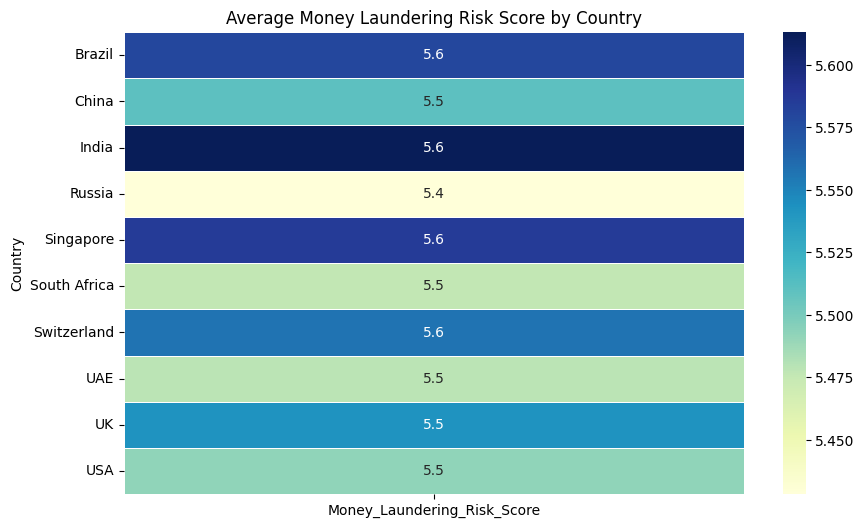

In [59]:
# Create pivot table
df5 = pd.pivot_table(
    data=df,
    index='Country',  # Ensure column name matches your dataset
    values='Money_Laundering_Risk_Score',
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data=df5, cmap='YlGnBu', annot=True, linewidths=0.5)
plt.title('Average Money Laundering Risk Score by Country')

plt.ylabel('Country')
plt.show()



<h5><i>Conclusion:
The heatmap shows how money laundering risk scores vary across different countries. Darker or more intense colors represent higher risk scores, indicating countries that may be more prone to money laundering activities. Lighter colors represent lower risk scores, suggesting less risk in those regions. This visualization helps identify which countries have higher financial crime risks, providing insight for regulatory focus and compliance efforts.

<h4><u><i>6. What is the proportion of transactions reported by authorities?

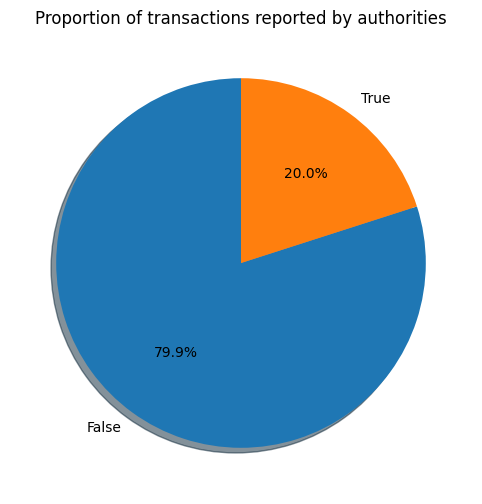

In [10]:
df6 = df['Reported_by_Authority'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(df6,labels=df6.index,autopct='%1.1f%%',startangle=90,shadow=True)
plt.title('Proportion of transactions reported by authorities')

plt.show()


<h5><i>Conclusion:The pie chart shows the proportion of transactions that are reported by authorities versus those that are not. Each segment represents the percentage of reported and unreported transactions. A larger segment indicates a greater proportion of transactions reported, highlighting the effectiveness of monitoring and compliance efforts in the financial system. This visualization helps identify the level of oversight on transactions and can point to areas needing improvement or increased regulatory focus.


<h4><u><i>7. What are the most common destination countries for transactions?

C:\Users\nikhi\AppData\Local\Temp\ipykernel_15076\2614722618.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=destination_counts_df.head(10), x='Destination_Country', y='Amount_(USD)', palette='viridis')


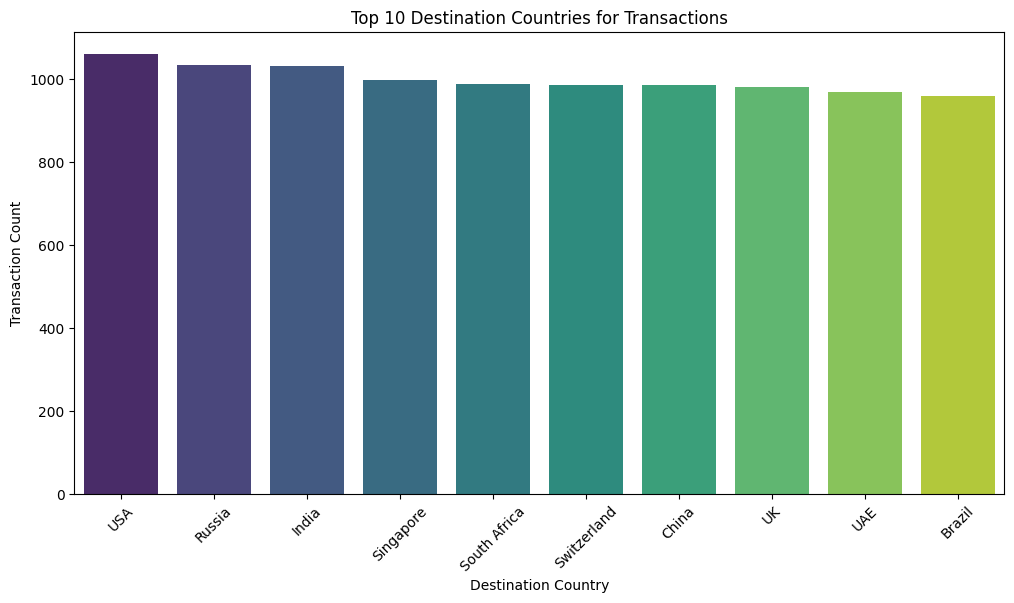

In [21]:
# Count occurrences of each destination country
destination_counts = df['Destination_Country'].value_counts()

# Convert to DataFrame for better visualization
destination_counts_df = destination_counts.reset_index()
destination_counts_df.columns = ['Destination_Country','Transaction_ID']

# Plotting the top destination countries
plt.figure(figsize=(12, 6))
sns.barplot(data=destination_counts_df.head(10), x='Destination_Country', y='Transaction_ID', palette='viridis')
plt.title('Top 10 Destination Countries for Transactions')
plt.xlabel('Destination Country')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.show()


<h5><i>Conclusion:This bar chart illustrates the count of transactions by destination country reveals which countries are most frequently involved in these transactions. The results show the number of transactions associated with each destination, highlighting potential hubs of financial activity. Identifying the most common destination countries can help inform regulatory scrutiny and monitoring efforts, as these countries may be significant in the context of financial crime, including money laundering or tax evasion. Understanding these patterns is essential for compliance and risk management in financial transactions.


<h4><u><i>8. How has the total transaction amount changed over time?

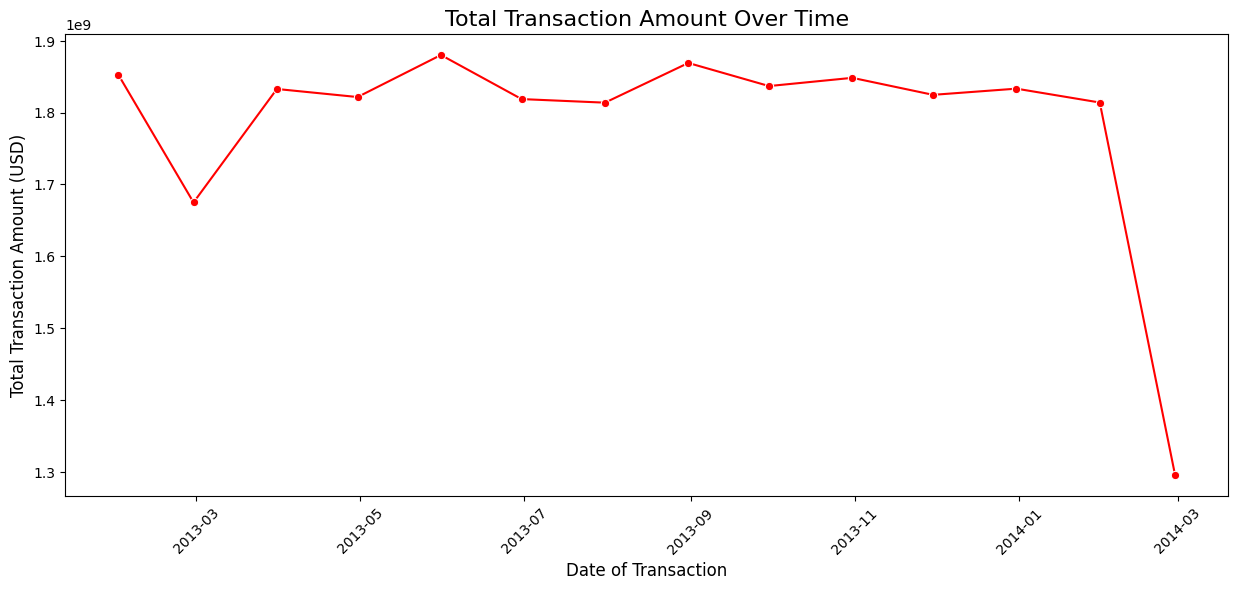

In [20]:
plt.figure(figsize=(15,6))
df_time = df.resample('ME',on = 'Date_of_Transaction')['Amount_(USD)'].sum().reset_index()
sns.lineplot(data = df_time ,x = 'Date_of_Transaction', y = 'Amount_(USD)',marker = 'o',color = 'red')
plt.xlabel('Date of Transaction', fontsize=12)
plt.ylabel('Total Transaction Amount (USD)', fontsize = 12)
plt.title('Total Transaction Amount Over Time', fontsize = 16)
plt.xticks(rotation = 45)
plt.show()


<h5><i>Conclusion :
The line plot shows how the total transaction amount has changed over time. An upward trend suggests growing financial activity, while a downward trend may indicate reduced transactions or improved regulations. Fluctuations can highlight significant events affecting transaction volumes. Understanding these trends helps identify areas that may need closer monitoring or investigation.

<h4><u><i>9. How does the source of money (Legal vs. Illegal) influence transaction amount or risk score?

C:\Users\nikhi\AppData\Local\Temp\ipykernel_16648\2082941040.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Source_of_Money', y='Amount_(USD)',palette='pastel')


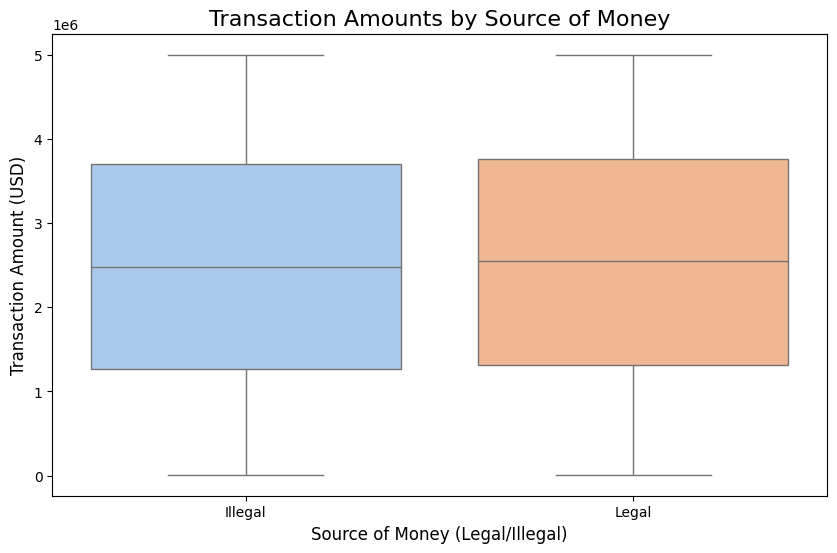

C:\Users\nikhi\AppData\Local\Temp\ipykernel_16648\2082941040.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Source_of_Money', y='Money_Laundering_Risk_Score',palette='dark')


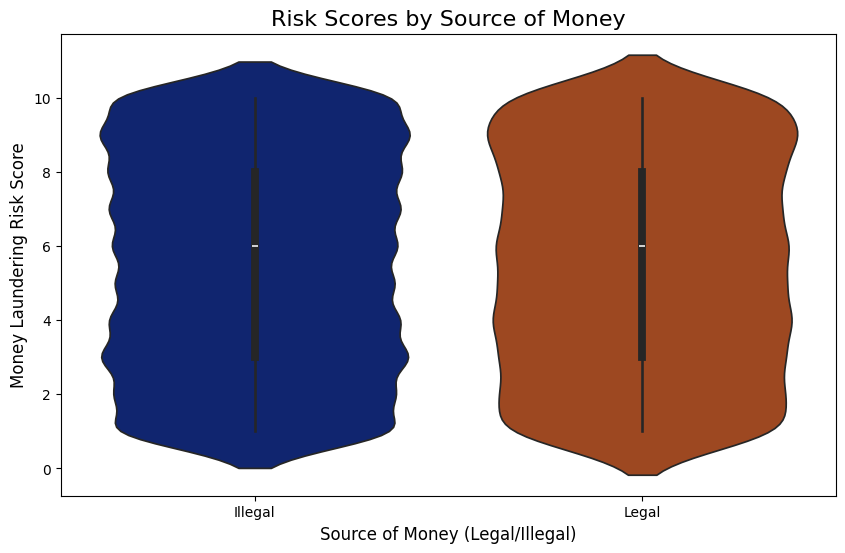

In [26]:
plt.figure(figsize=(10, 6))

# Box plot for transaction amounts
sns.boxplot(data=df, x='Source_of_Money', y='Amount_(USD)',palette='pastel')
plt.xlabel('Source of Money (Legal/Illegal)', fontsize=12)
plt.ylabel('Transaction Amount (USD)', fontsize=12)
plt.title('Transaction Amounts by Source of Money', fontsize=16)
plt.show()

# Create a box plot comparing risk scores between legal and illegal sources
plt.figure(figsize=(10, 6))

# violinplot for risk scores
sns.violinplot(data=df, x='Source_of_Money', y='Money_Laundering_Risk_Score',palette='dark')
plt.xlabel('Source of Money (Legal/Illegal)', fontsize=12)
plt.ylabel('Money Laundering Risk Score', fontsize=12)
plt.title('Risk Scores by Source of Money', fontsize=16)
plt.show()



<h5><i>Conclusion:
    The box plot comparing transaction amounts based on the source of money (Legal vs. Illegal) shows the distribution and median of transaction values for each category. If the box for illegal sources is significantly higher, it suggests that illegal transactions tend to involve larger amounts, potentially indicating more significant financial crimes.

        The violin plot illustrating the risk scores based on the source of money provides insights into the density and distribution of risk scores. A wider spread or higher median for illegal sources indicates that these transactions typically carry a greater risk of money laundering or financial crime compared to legal sources.

<h4><u><i>10. Which industries are most associated with high money laundering risk scores?

C:\Users\nikhi\AppData\Local\Temp\ipykernel_16648\1889436571.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= df2 , x ='Industry', y = 'Money_Laundering_Risk_Score',palette='tab20b')


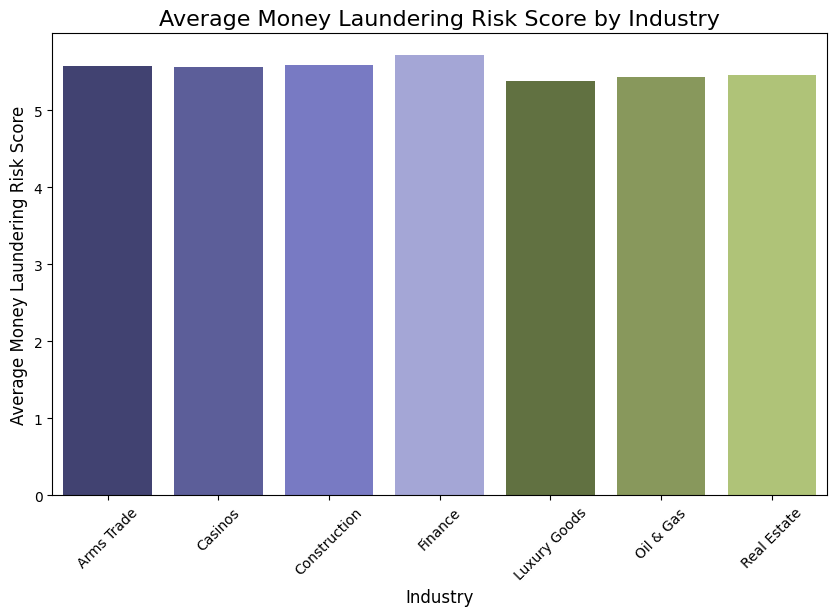

In [27]:
df2 = pd.pivot_table(
    data=df,
    index='Industry',
    values=['Money_Laundering_Risk_Score'],
    aggfunc='mean'
).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data= df2 , x ='Industry', y = 'Money_Laundering_Risk_Score',palette='tab20b')
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Average Money Laundering Risk Score', fontsize=12)
plt.title('Average Money Laundering Risk Score by Industry', fontsize=16)
plt.xticks(rotation=45)  
plt.show()


<h5><i>Conclusion : The bar plot illustrating industries associated with high money laundering risk scores highlights which sectors are most prone to financial crime. Industries with taller bars indicate higher average risk scores, suggesting they are more frequently involved in suspicious transactions. This visualization helps identify sectors that may require increased scrutiny and regulatory measures to combat money laundering effectively. By focusing on these high-risk industries, financial institutions and regulators can better allocate resources and implement targeted strategies to enhance compliance and reduce the risk of illicit activities.